Introduction
--------------

In this section, we start designing FIR filters using the windowing design method. This is the most straightforward design method and it will illustrate the concepts we  developed in the previous section.


### Windowing Method

The window method of FIR filter design starts by constructing the ideal filter response, $ H_d(\omega) $. For example, consider the ideal lowpass filter,

$$ |H_d(\omega)| =1 \forall \omega \in (-\omega_c,\omega_c) $$

and zero otherwise. The  inverse Fourier transform is the sequence,

$$ h_n = \frac{\omega_c}{\pi}\frac{\sin (\omega_c n )}{\omega_c n} $$

if $ n \neq 0 $ and 

$$ h_{n=0} = \frac{\omega_c}{\pi} $$

This is obviously non-causal and infinitely long. We can shift the sequence by an arbitrary amount and then truncate to fix both problems, respectively.


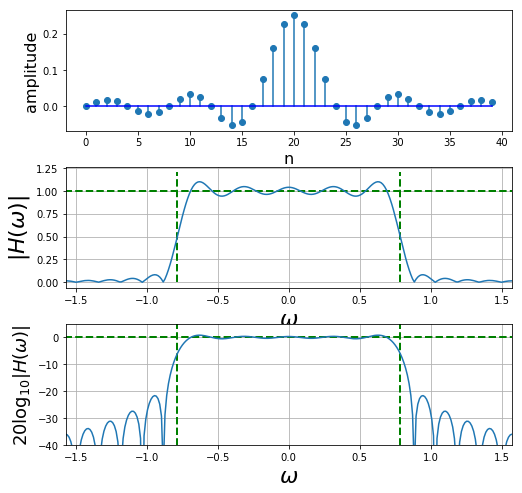

In [76]:
# omega_c = pi/4
import math as m
import numpy as np
import matplotlib.pyplot as plt
from __future__ import  division
from scipy import signal

wc = m.pi/4
M=20
N = 512 # DFT size
n = np.arange(-M,M)
h = wc/m.pi * np.sinc(wc*(n)/m.pi)  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = np.fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
plt.subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("n",fontsize=16)
ax.set_ylabel("amplitude",fontsize=16)

ax=axs[1]
ax.plot(w-m.pi,abs(np.fft.fftshift(Hh)))
ax.axis(xmax=m.pi/2,xmin=-m.pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-m.pi,m.pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)
ax.grid()

ax=axs[2]
ax.plot(w-m.pi,20*np.log10(abs(np.fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=m.pi/2,xmin=-m.pi/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-m.pi,m.pi,color='g',lw=2.,linestyle='--',)
ax.grid()
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)
#ax.axis( ymin=-40,xmax=pi/2)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

The figure above shows the filter sequence  hnhn  in the top plot. This has been shifted over to enforce causality. The middle plot shows  |H(ω)||H(ω)|  as a function of frequency. The vertical green lines show  ±ωc±ωc  limits and the horizontal green line shows the ideal response,  |Hd(ω)||Hd(ω)| . The bottom plot shows  20log10|H(ω)|20log10⁡|H(ω)| as a function of frequency. The middle plot reveals rippling in the passband that increases towards the edge of the passband. This is known as the Gibbs phenomenon and we need to examine it carefully because it is a serious form of distortion.

Truncating the filter coefficients is the same as multiplying the infinitely-long desired filter sequence ($ h_{d} $) by a rectangular window ($ w_n $); this is equivalent to a convolution in the frequency domain between  the desired reponse, $ H_d(\omega) $, and $ W(\omega)$, the Fourier transform of the rectangular window. Thus, the filter output is

$$ Y(\omega)  = \frac{1}{2\pi}\int_{-\pi}^{\pi} H_d(\xi) W(\omega-\xi) d\xi = \frac{1}{2\pi}\int_{-\omega_c}^{\omega_c}W(\omega-\xi) d\xi$$

where 

$$ W(\omega)=\sum_{n=0}^{N_s-1} \exp \left( -j\omega n \right) $$

Because everything is finite, we can combine these   two equations to  obtain the following:

$$ Y(\omega) = \frac{1}{2\pi}\sum_{n=0}^{N_s-1}\int_{-\omega_c}^{\omega_c} \exp \left( -j(\omega-\xi) n \right) d\xi =\frac{1}{\pi}\sum_{n=0}^{N_s-1}\frac{\sin(n\omega_c)}{n} \hspace{1em}\exp(j\omega n) $$ 

We can expand the summation term to obtain,

$$ Y(\omega) = \frac{1}{\pi}\sum_{n=0}^{N_s-1}\frac{\cos(n\omega)\sin(n\omega_c)+j\sin(n\omega)\sin(n\omega_c)}{n} $$ 

To understand the Gibbs phenomenon at the edges where $ \omega=\omega_c $, we recall the following two trigonometric identities:

$$ 2\cos(n\omega)\sin(n\omega_c)= \sin(n\omega+n\omega_c)-\sin(n\omega-n\omega_c) $$

and likewise,

$$ 2\sin(n\omega)\sin(n\omega_c)= \cos(n\omega-n\omega_c)-\cos(n\omega+n\omega_c) $$

These two identities show that as $ \omega \rightarrow \omega_c $, the surviving terms in $ Y(\omega) $ summation oscillate at double the cut-off frequency (i.e $ 2\omega_c $) which accounts for the intense rippling effect as $ \omega $ moves from $ \omega=0 $ to $\omega=\omega_c$. Consider the real part of $ Y(\omega) $ when $ \omega \lt \omega_c $,

$$ Y_{re}(\omega) = \frac{1}{\pi}\sum_{n=0}^{N_s-1}\frac{\sin(n\omega+n\omega_c)-\sin(n\omega-n\omega_c)}{2 n} $$ 


In this case, $ \sin(n\omega-n\omega_c) \lt 0 $ so it contributes positively (i.e. constructive interference) to the summation. When $\omega \gt \omega_c  $, the sign  reverses and destructive interference reduces the real part. This is the mechanism that characterizes the transition from the passband to the stopband.

The following figure illustrates this effect.

In [72]:
fig,ax = plt.subplots()
fig.set_size_inches(6,3)

k=np.arange(M)
omega = np.linspace(0,m.pi,100)

ax.plot(omega,(np.sin(k*omega[:,None]+k*wc)-np.sin(k*omega[:,None]-k*wc)).sum(axis=1))
ax.set_ylabel(r"$Y_{re}(\omega)$",fontsize=18)
ax.grid()
ax.set_title(r"$\omega_c = \m.pi/4$",fontsize=22)
ax.set_xlabel(r" $\omega $",fontsize=22)
ax.set_xticks([0, m.pi/4,m.pi/2.,3*m.pi/4, m.pi,])
ax.set_xticklabels(['$0$',r'$\frac{\m.pi}{4}$',r'$\frac{\m.pi}{2}$',r'$\frac{3\m.pi}{4}$', r'$\m.pi$'],fontsize=18)
ax.set_xlim(xmax=m.pi)
ax.annotate("Gibbs phenomenon",xy=(m.pi/4,10),fontsize=14,
            xytext=(20,0),
            textcoords='offset points',
            arrowprops={'facecolor':'b','arrowstyle':'->'})

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

ValueError: 
\frac{\m.pi}{4}
      ^
Unknown symbol: \m (at char 6), (line:1, col:7)

Now that we have a grip on the the Gibbs phenomenon, we need to control this form of distortion. Fortunately, we already have all of the tools in place from our prior discussion of window functions.

## Using Windows for FIR Filter Design
The root of the Gibbs phenomenon is the sudden truncation of the filter sequence by the rectangular window. We can mitigate this effect by smoothly guiding the filter coefficients to zero using a window function. The following figure is the same as before but now we use a Hamming window to terminate the ideal filter sequence.

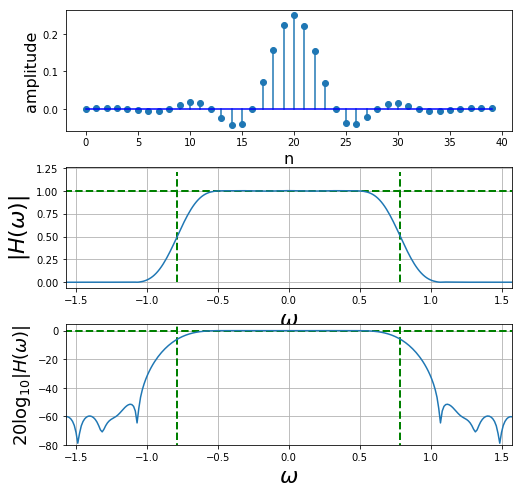

In [73]:
wc = m.pi/4

M=20

N = 512 # DFT size
n = np.arange(-M,M)
win = signal.hamming(len(n))
h = wc/m.pi * np.sinc(wc*(n)/m.pi)*win  # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = np.fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
plt.subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("n",fontsize=16)
ax.set_ylabel("amplitude",fontsize=16)

ax=axs[1]
ax.plot(w-m.pi,abs(np.fft.fftshift(Hh)))
ax.axis(xmax=m.pi/2,xmin=-m.pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-m.pi,m.pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)
ax.grid()

ax=axs[2]
ax.plot(w-m.pi,20*np.log10(abs(np.fft.fftshift(Hh))))
ax.axis(ymin=-80,xmax=m.pi/2,xmin=-m.pi/2)
ax.vlines([-wc,wc],10,-80,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-m.pi,m.pi,color='g',lw=2.,linestyle='--',)
ax.grid()
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)
#ax.axis( ymin=-40,xmax=pi/2)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

The figure above shows the frequency response using a Hamming window to gently terminate the filter sequence. Note that the Gibbs effect is significantly reduced, producing a much flatter mainlobe at the cost of a wider mainlobe. The mainlobe widens because the mainlobe of the Hamming window is wider than that of the rectangular window. The much lower sidelobes of the Hamming window flattens the Gibbs phenomenon at the edge of the passband.

I invite you to download the IPython notebook corresponding to this post and try the above for different values of  MM . Note that drop from the passband to the sidelobes steepens with increasing  MM . As we have seen before with window functions, this is because the window's mainlobe narrows with increasing sequence length. Naturally, you can use other window functions besides Hamming and change the sidelobe level and mainlobe width. The most popular window used for this method of filter design is the Kaiser-Bessel window because it provides extra parameters for tuning the frequency response.

Let's consider a design example using Kaiser-Bessel and the filter design tools in the signal.fir_filter_design module.

The signal.fir_filter_design module provides functions for filter design using the Kaiser-Bessel window ( among other windows). For example, to design a lowpass filter using the Kaiser-Bessel window, we need the a subset of the following parameters: maximum passband ripple ( δδ ), width of the transition region, Kaiser-Bessel parameter  ββ , and the number of filter taps. The fir_filter_design provides tools to solve for some of these parameters given others. For example, the fir_filter_design.kaiserord() function can determine the number of taps given the maximum allowable passband ripple and the width of the transition region.
Consider the following low pass filter specification.

In [74]:
Ns =300 # number of samples 
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband

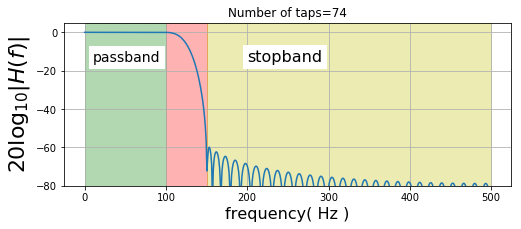

In [75]:
from matplotlib.patches import Rectangle

M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))

hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)
w,H = signal.freqz(hn) # frequency response

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/m.pi*fs/2.,20*np.log10(abs(H)))
ax.set_xlabel("frequency( Hz )",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,height=ymax-ymin,color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,height=ymax-ymin,color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,height=ymax-ymin,color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

### Summary

The window design method is the easiest FIR design method to understand and it draws upon intuitions regarding window function that we have previously developed. The Kaiser-Bessel method is widely used because it provides design flexibility and easy-to-understand filter specifications. Furthermore, there are many closed form approximations to the various derived terms (e.g.  ββ ,  MM ) which means that time-consuming iterative algorithms are not necessary and that engineering trade-offs appear explicitly in a formula.
In the next section we consider Parks-McClellan FIR design that solves for the desired filter sequence using a powerful iterative exchange algorithm that generally results in filters with fewer taps for the same level of performance.

### References
Proakis, John G. ,Digital signal processing: principles algorithms and applications. Pearson Education India, 2001.
Oppenheim, Schafer, "Discrete-Time Signal Processing", p.475-476.